# 決定木

木の形をした閉路のない有向グラフを指す。    
それぞれの葉が分類グループを表し、トップダウンに木の中を進み、たどり着いた葉に分類される。    

長所:
    - 分かりやすい     
    - 訓練後はif文のみで結果を出せるので予測が高速     
    - データの前処理(たとえば正規化)があまり必要ない    
    
短所:
    - 精度は高くない      
    - 不安定(木の形が変わりやすい)    

In [20]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pydotplus

In [21]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

## scikit-learnの分類器を使用

In [23]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(train_X, train_y)

In [24]:
pred_y = clf.predict(test_X)
f1_score(test_y[:len(pred_y)], pred_y, average='macro')

0.85291173837853163

## 決定木の可視化

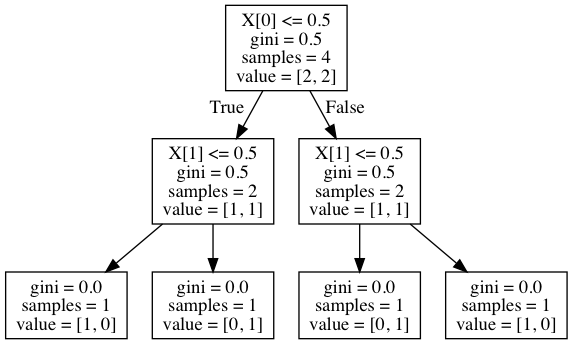

In [30]:
# XORで学習
train_X = [[0,0],[1,0],[0,1],[1,1]]
train_y = [0,1,1,0]
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(train_X, train_y)
data = StringIO()
tree.export_graphviz(clf, out_file=data,)
graph = pydotplus.graph_from_dot_data(data.getvalue())
display.display(display.Image(graph.create_png()))

Value とはその葉に割り当てられた各ラベルのサンプル数の数

## 応用
* 木の深さを変えてみて、挙動を調べる。

In [25]:
score_array = []

for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
    score_array.append(score)

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


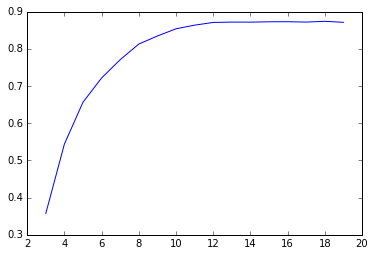

In [26]:
plt.plot(range_array, score_array)